## 계단 오르내리기 예제

### Python

In [3]:
import random

position = 0
walk = [position]

nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

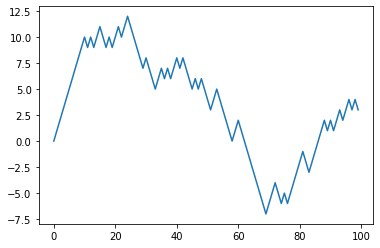

In [4]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

### Numpy

In [5]:
import numpy as np

nsteps = 1000

rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)

walk = steps.cumsum()

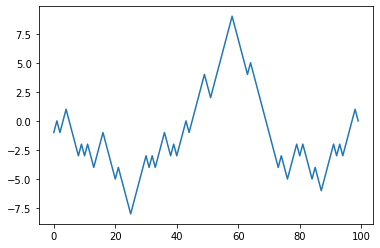

In [6]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

In [8]:
print("min:", walk.min())
print("max:", walk.max())

min: -8
max: 50


In [9]:
print("처음으로 10칸 떨어진 step:", (np.abs(walk) >= 10).argmax())

처음으로 10칸 떨어진 step: 155


In [10]:
# Run 5000 times

nwalks = 5000
nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [12]:
print("min:", walks.min())
print("max:", walks.max())

min: -120
max: 114


In [17]:
# 30칸 이상이 떨어진 step들
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30)
print("30칸 이상 떨어진 step 개수:", hits30.sum())

[False  True  True ...  True False  True]
30칸 이상 떨어진 step 개수: 3395


In [19]:
# 처음으로 30칸 이상 떨어진 step
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print(crossing_times)
print("각 walk 별, 처음으로 30칸 떨어진 step 평균:", crossing_times.mean())

[201 491 283 ... 219 259 541]
각 walk 별, 처음으로 30칸 떨어진 step 평균: 500.5699558173785
